   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160


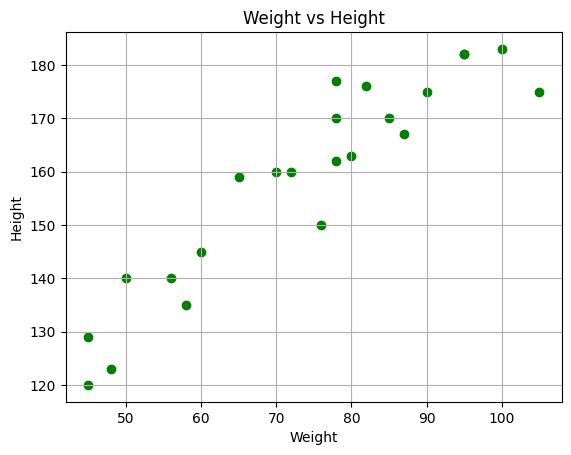

Correlation:           Weight    Height
Weight  1.000000  0.931142
Height  0.931142  1.000000


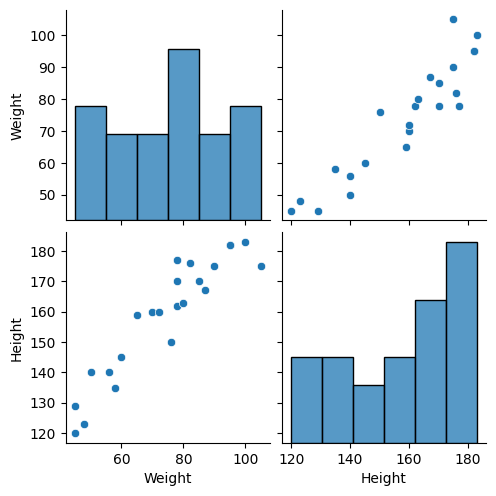

X shape: (23, 1)
Y shape: (23,)
X_train shape: (17, 1)
Coefficient (Slope): [17.2982057]
Intercept: 156.47058823529412


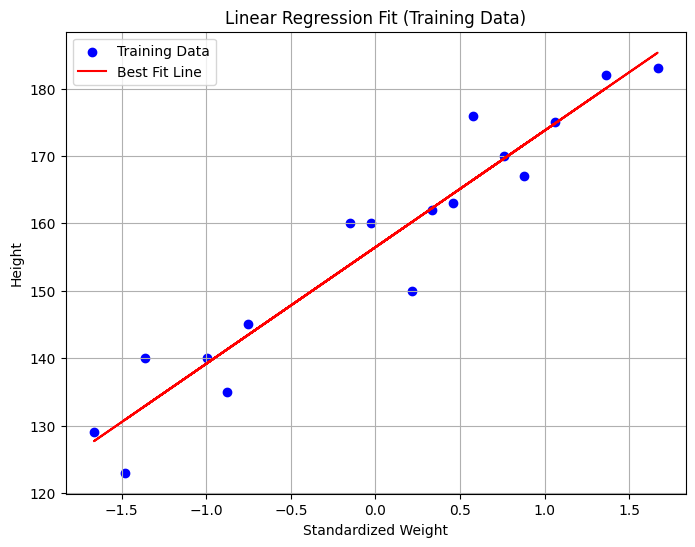

Predicted Heights: [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]
Mean Squared Error (MSE): 114.84069295228699
Mean Absolute Error (MAE): 9.66512588679501
Root Mean Squared Error (RMSE): 10.716374991212605
R² Score: 0.7360826717981276
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           1.16e-10
Time:                        13:17:36   Log-Likelihood:                -77.255
No. Observations:                  23   AIC:                             158.5
Df Residuals:                      21   BIC:                             160.8
Df Model:                           1                                         
Covariance Type:    

c:\Users\sahus\OneDrive\Desktop\Complete Data Science\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# 📦 Step 1: Import Required Libraries
import pandas as pd  # Data manipulation and analysis
import matplotlib.pyplot as plt  # Plotting graphs
import numpy as np  # Numerical operations
import seaborn as sns  # Statistical data visualization
%matplotlib inline
import statsmodels.api as sm  # For OLS regression

# 📂 Step 2: Load and View Dataset
df = pd.read_csv("height-weight.csv")
print(df.head())
#      Weight  Height
# 0      45     120
# 1      58     135
# 2      48     123
# 3      60     145
# 4      70     160

# 📈 Step 3: Visualize the Data (Scatter Plot)
#plt.figure(figsize=(8, 6))  
plt.scatter(df['Weight'], df['Height'], color='green')
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight vs Height")
plt.grid(True) 
plt.show()
# As Weight increases, Height also tends to increase

# 📊 Step 4: Correlation Check
# High correlation (e.g., 0.93) means strong relationship between weight and height.
print("Correlation:", df.corr())  # Shows correlation matrix

# Correlation:Weight  Height
# Weight  1.000000  0.931142
# Height  0.931142  1.000000

# 🖼️ Step 5: Visualize Pairwise Relationships (Optional)
sns.pairplot(df)
plt.show()

# 📉 Step 6: Linear Regression Preparation
# Independent variable: Weight (X)
# Dependent variable: Height (Y)

X = df[["Weight"]]  # Must be a 2D DataFrame
Y = df["Height"]    # Can be a 1D Series

print("X shape:", np.array(X).shape) # Output: (23, 1) # 2D array
print("Y shape:", np.array(Y).shape) # Output: (23,) # 1D array

# ✂️ Step 7: Train-Test Split
#sklearn.model_selection is a module that provides various functions to split datasets 
# into training and testing sets.
#random_state=42 ensures reproducibility of results.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("X_train shape:", X_train.shape) # Output: (17, 1)

# 📏 Step 8: Standardize the Data
# Many machine learning models (like linear regression, SVM, etc.) perform better when features are on the same scale.
# Especially useful when features have very different units or ranges.
#sklearn.preprocessing is a module that provides various functions to preprocess data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🧮 Step 9: Apply Linear Regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1) #n_jobs=-1 uses all available cores, making computations faster for large datasets or complex models.
regression.fit(X_train, Y_train)   # trains (fits) the linear regression model

# Print model parameters
print("Coefficient (Slope):", regression.coef_)       # Output: Coefficient: [17.2982057]
print("Intercept:", regression.intercept_)            # Output: Intercept: 156.47058823529412

# 📈 Step 10: Visualize Best Fit Line based on X_train and Y_train using scatter plot 
plt.figure(figsize=(8, 6))
plt.scatter(X_train, Y_train, color='blue', label='Training Data')
plt.plot(X_train, regression.predict(X_train), color='red', label='Best Fit Line')
plt.xlabel("Standardized Weight")
plt.ylabel("Height")
plt.title("Linear Regression Fit (Training Data)")
plt.legend()
plt.grid(True)
plt.show()

# 🔍 Step 11: Predict on Test Data
y_pred = regression.predict(X_test)
print("Predicted Heights:", y_pred) # Output: Predicted Heights: [162. 162. 127. 180. 148. 190.]

# 📊 Step 12: Evaluate the Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

# Predicted Heights: [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
#  190.55897293]
# Mean Squared Error (MSE): 114.84069295228699
# Mean Absolute Error (MAE): 9.66512588679501
# Root Mean Squared Error (RMSE): 10.716374991212605
# R² Score: 0.7360826717981276

# 📋 Step 13: Apply OLS Regression (Statsmodels)
# OLS (Ordinary Least Squares) is a statistical technique used to find the best-fitting straight line (regression line) through 
# the data by minimizing the sum of the squared differences (errors) between the observed values and the values predicted by the line
# model = sm.OLS(Y, X).fit()
# Re-define X to include constant term for intercept
X_ols = sm.add_constant(df["Weight"])
ols_model = sm.OLS(df["Height"], X_ols).fit()
print(ols_model.summary())

# 🔮 Step 14: Predict New Data Point (Weight = 98kg)
weight_input = 98
standardized_input = scaler.transform([[weight_input]])  # Standardize the input for sklearn model
predicted_height = regression.predict(standardized_input)
print(f"Predicted Height for {weight_input} kg (Scikit-learn):", predicted_height[0])

# Predicted Heights: [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
#  190.55897293]
# Mean Squared Error (MSE): 114.84069295228699
# Mean Absolute Error (MAE): 9.66512588679501
# Root Mean Squared Error (RMSE): 10.716374991212605
# R² Score: 0.7360826717981276
#                             OLS Regression Results                            
# ==============================================================================
# Dep. Variable:                 Height   R-squared:                       0.867
# Model:                            OLS   Adj. R-squared:                  0.861
# Method:                 Least Squares   F-statistic:                     136.9
# Date:                Sat, 28 Jun 2025   Prob (F-statistic):           1.16e-10
# Time:                        13:17:36   Log-Likelihood:                -77.255
# No. Observations:                  23   AIC:                             158.5
# Df Residuals:                      21   BIC:                             160.8
# Df Model:                           1                                         
# Covariance Type:            nonrobust                                         
# ==============================================================================
#                  coef    std err          t      P>|t|      [0.025      0.975]
# ------------------------------------------------------------------------------
# const         83.3438      6.591     12.645      0.000      69.637      97.050
# Weight         1.0165      0.087     11.701      0.000       0.836       1.197
# ==============================================================================
# Omnibus:                        0.150   Durbin-Watson:                   1.338
# Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.178
# Skew:                          -0.152   Prob(JB):                        0.915
# Kurtosis:                       2.693   Cond. No.                         329.
# ==============================================================================
#Predicted Height for 98 kg (Scikit-learn): 183.22349773962515





In [2]:
# 📦 Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  # OLS is here
import numpy as np

# 📂 Step 2: Load Data
df = pd.read_csv("height-weight.csv")
print(df.head())

# 🎯 Step 3: Define Independent and Dependent Variables
X = df["Weight"]
Y = df["Height"]

# Add constant to the model (adds the intercept term β₀)
X = sm.add_constant(X)  # statsmodels requires this for the intercept

# 📈 Step 4: Fit OLS Model
model = sm.OLS(Y, X).fit()

# 📊 Step 5: View Summary
print(model.summary())

# 🔮 Step 13: Predict New Data Point
regression.predict(scaler.transform([[98]]))  # Predict height for weight = 98 kg
print("Predicted Height for 98 kg:", regression.predict(scaler.transform([[98]]))) #Predicted Height for 98 kg: [183.22349774]




   Weight  Height
0      45     120
1      58     135
2      48     123
3      60     145
4      70     160
                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     136.9
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           1.16e-10
Time:                        10:00:01   Log-Likelihood:                -77.255
No. Observations:                  23   AIC:                             158.5
Df Residuals:                      21   BIC:                             160.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

c:\Users\sahus\OneDrive\Desktop\Complete Data Science\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\sahus\OneDrive\Desktop\Complete Data Science\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 5.6 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.8 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/9.8 MB 3.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.8 MB 2.5 MB/s eta 0:00:04
   -------- ------------------------------- 2.1/9.8 MB 2.4 MB/s eta 0:00:04
   --------- ------------------------------ 2.4/9.8 MB 1.9 MB/s eta 0:00:04
   ------------ --------------------------- 3.1/9.8 MB 2.3 MB/s eta 0:00:03
   -------------- ------------------------- 3.7/9.8 MB 2.3 MB/s eta 0:00:03
   ----------------- ---------------------- 4.2/9.8 MB 2.3 MB/s eta 0:00:03
   ------------------ --------------------- 4.5/9.8 MB 2.3 MB/s eta 0:00:03
   --------------------- ------------------ 5.2/9.8 MB 2.3 MB/s eta 0:00:02
   ----------------------- ---------------- 5.8/9.8 MB 2.4 MB/s eta 0:00:02
   ----------------